In [1]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Wall time: 0 ns


## Simple Linear Regression 
##### Enginesize( indepdendent variable) CO2 Emission (dependent var)


In [60]:
df = pd.read_csv("FuelConsumption.csv") 
# df.head(1067)


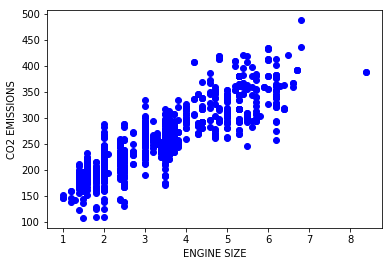

In [9]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='b')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

## looks from the graph below, it looks like a positive linear regresssion

In [136]:
# train = df[np.random.rand(len(df)) < .8 ]
# len(train)
# test = df[np.random.rand(len(df)) > .8 ]
# len(test)
# x_train = train.ENGINESIZE; x_test= test.ENGINESIZE; y_train=train.CO2EMISSIONS; y_test=test.CO2EMISSIONS

# print(len(x_train), len(x_test))


ENGINESIZE    853
dtype: int64 ENGINESIZE    214
dtype: int64 CO2EMISSIONS    853
dtype: int64 CO2EMISSIONS    214
dtype: int64
[126.18920155] [[39.24838431]]
0.7201153918073576 0.7201153918073576 25.56889045602356 1181.528809303555 34.37337355139229


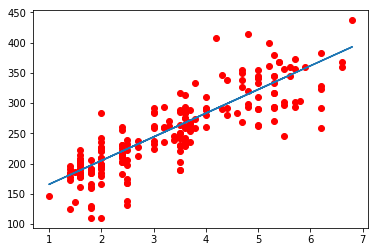

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error , mean_absolute_error, r2_score


x=  df[["ENGINESIZE"]] 
y = df[["CO2EMISSIONS"]]
type(x)
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0)
print(x_train.count(), x_test.count(), y_train.count(), y_test.count() )
x_train.head()
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.intercept_, regr.coef_)
regr.predict(x_test)
print(regr.score(x_test, y_test),r2_score(y_test, regr.predict(x_test) ), mean_absolute_error(y_test, regr.predict(x_test)), mean_squared_error(y_test, regr.predict(x_test)) ,np.sqrt( mean_squared_error(y_test, regr.predict(x_test)) ) )
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, regr.predict(x_test))


In [74]:
import pickle
with open("my_linear_model", 'wb') as file:
    pickle.dump(regr, file)
    
with open("my_linear_model", 'rb') as file:
    my_model=pickle.load(file)
    
    
my_model.predict(3.5)

array([[263.55854664]])

##  Multiple LInear Regression


'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB ( indepdendent variable) CO2 Emission (dependent var)

In [168]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

df = pd.read_csv("FuelConsumption.csv") 
# df.head(1067)


x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']] 
y = df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.intercept_, regr.coef_)
regr.predict(x_test)
print(regr.score(x_test, y_test),r2_score(y_test, regr.predict(x_test) ), mean_absolute_error(y_test, regr.predict(x_test)), mean_squared_error(y_test, regr.predict(x_test)) ,np.sqrt( mean_squared_error(y_test, regr.predict(x_test)) ) )


Wall time: 0 ns
[69.05220993] [[11.98993058  7.54469599  8.98695981]]
0.8604199405627129 0.8604199405627128 18.01627010250148 589.2351940837908 24.274167217101205


##  Polynomial Regression


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


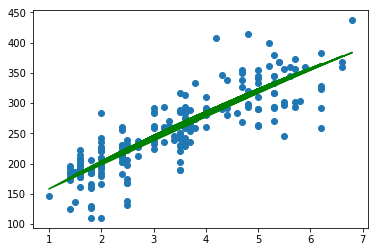

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  mean_squared_error , r2_score

df = pd.read_csv("FuelConsumption.csv") 
df.head(1067)

x = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
# print(x_train_poly)

regr1 =  LinearRegression()
regr1.fit(x_train_poly, y_train)
# print( regr.intercept_ , regr.coef_)

plt.scatthttp://localhost:8889/notebooks/Python/ML%20CHEATSHEET.ipynb#Linear-vs-Polynomialer(x_test, y_test)
plt.plot(x_test, regr1.predict(x_test_poly) ,color='g')

## Linear vs Polynomial




[-270909.09090909] [[49000.]]
0.7430008179654967 0.7430008179654967


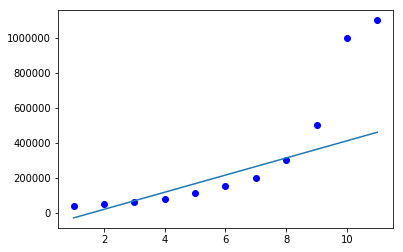

[222121.21212121] [[      0.         -128006.99300699   18962.7039627 ]]
0.9533019239667068 0.9533019239667069


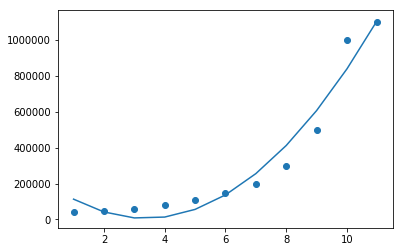

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_excel("salary.xlsx")
x = df[["Level"]]
y = df[["Salary"]]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0, random_state=0)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Linear Regression
regr1 = LinearRegression()
regr1.fit(x, y)
print(regr1.intercept_, regr.coef_)
print( regr1.score(x, y), r2_score(y, regr1.predict(x)) )
plt.scatter(x, y, color='b')
plt.plot(x, regr.predict(x))
plt.show()


## Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
regr2 = LinearRegression()
regr2.fit(x_poly, y)
print(regr2.intercept_, regr2.coef_)
print(regr2.score(x_poly,y), r2_score(y, regr2.predict(x_poly)) )
plt.scatter(x, y)
plt.plot(x, regr2.predict(x_poly))


## Classification - K nearest neighbours (KNNs)




In [1]:
import pandas as pd
import numpy as np

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 
The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 
The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

C:\Users\anjumm\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


The best accuracy was with  0.34 with k= 7


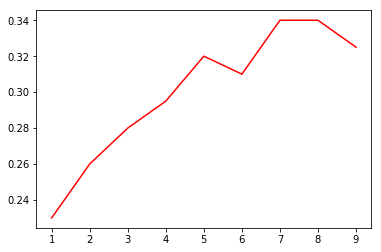

In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools
%matplotlib inline
df = pd.read_csv("TeleCustomer.csv")
# df.count()
df.custcat.value_counts()
# 3    281
# 1    266
# 4    236
# 2    217

# df.hist(column='income', bins=50)
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
### either uer StandardScaler or scale method to normazlize the data. Data normalization gives 0 meana and unit variance.
# x = StandardScaler().fit(x1).transform(x)
x= scale(x)
y = df[["custcat"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# print(x_train.shape, x_test.shape)

#Train Model and Predict   for a given value of k for example k=2 here.
#k = 2
# neighbors = KNeighborsClassifier(n_neighbors = k)
# neighbors.fit(x_train,y_train)
# neighbors.predict(x_test)

# print("Train dataset accuracy", accuracy_score(y_train,neighbors.predict(x_train) ) )
# print("Test dataset accuracy",  accuracy_score(y_test, neighbors.predict(x_test) ) )

# print("Train dataset F1 score",  classification_report(y_train, neighbors.predict(x_train) ) )
# print("Test dataset F1 score",  classification_report(y_test, neighbors.predict(x_test) ) )


#Train Model and Predict along with finding the value of k for best fit.
k=10
accumulator=[]

for j in range(1, k):
    
    neighbors = KNeighborsClassifier(n_neighbors = j).fit(x_train,y_train)
    accumulator.append(accuracy_score(y_test, neighbors.predict(x_test)))
    
accumulator = np.array(accumulator)
plt.plot(range(1,k),accumulator,'red')
print("The best accuracy was with " ,accumulator.max(),"with k=" ,accumulator.argmax()+1 ) 


##    Classification - Logistic Regression

In [257]:
import pandas as pd
import numpy as np
df = pd.read_csv("ChurnData.csv")
x = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = df['churn']

## litlle cleansing  i.e. making float value to int for algorith application.
y = y.astype(int)
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

# print ('Train set:', x_train.shape,  y_train.shape)
# print ('Test set:', x_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
yhat=model.predict(x_test)
yhat_prob = model.predict_proba(x_test)
print("score is " , model.score(x_test, y_test) )

from sklearn.metrics import jaccard_similarity_score, confusion_matrix, log_loss, classification_report
print("Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0")
print("jaccard index is \n",jaccard_similarity_score(y_test, yhat) )
print("Another way of looking at accuracy of classifier is to look at confusion matrix\n")
print("congfusion matrix is \n ", confusion_matrix(y_test, yhat))
print("The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.")
print("F1score is\n " ,classification_report(y_test, yhat))
print("Now lets try log loss for evaluation.In logistic regression the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1 Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.")

print("log loss is  \n", log_loss(y_test,yhat))

score is  0.8
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0
jaccard index is 
 0.8
Another way of looking at accuracy of classifier is to look at confusion matrix

congfusion matrix is 
  [[26  5]
 [ 3  6]]
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.
F1score is
               precision    recall  f1-score   support

          0       0.90      0.84      0.87        31
          1       0.55      0.67      0.60         9

avg / total       0.82      0.80      0.81        40

Now lets try log loss for evaluation.In logistic regression 

## Classification - Decision Tree

In [160]:
import pandas as pd
import numpy as np

df = pd.read_csv("drug.csv")
df.count()
x= df.iloc[: , 0:5]
y= df.iloc[:,5]

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
x["Sex"] = le_sex.fit_transform(x.Sex)
le_BP = preprocessing.LabelEncoder()
x["BP"] = le_BP.fit_transform(x.BP)
le_Chol = preprocessing.LabelEncoder()
x["Cholesterol"] = le_Chol.fit_transform(x.Cholesterol)

from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy",max_depth = 3, random_state=0)
dtree.fit(x_train, y_train)
print(y_test[0:5], dtree.predict(x_test)[0:5])

from sklearn.metrics import accuracy_score
print("The score is " ,accuracy_score(y_test, dtree.predict(x_test)) )
print("The score is ", dtree.score(x_test, y_test))

####Let's visualize the tree.
# from sklearn.external.six import StringIO
# import matplotlib.image as mpimg
# import pydotplus
# %matplotlib inline

18     drugC
170    drugX
107    drugY
98     drugY
177    drugY
Name: Drug, dtype: object ['drugC' 'drugX' 'drugY' 'drugY' 'drugY']
The score is  0.875
The score is  0.875


## Decision tree vs logistic regression - Titanic Data

In [258]:
import pandas as pd
import numpy as np
df = pd.read_csv('http://bit.ly/kaggletrain')
df.shape
df.count() 

####### Analyzing the dat now

import  matplotlib.pyplot as plt
# plt.figure(figsize=(18,6))
# # df.Survived.value_counts().plot(kind='bar')
# plt.subplot2grid((3,3), (0,0))
# plt.title("Survived vs died")
# df.Survived.value_counts(normalize=True).plot(kind='bar')

# plt.subplot2grid((3,3), (0,1))
# plt.title("Age vs Survived")
# plt.scatter(df.Survived, df.Age)

# plt.subplot2grid((3,3),(0,2))
# plt.title("Class Survived")
# df.Pclass.value_counts(normalize=True).plot(kind='bar')


# plt.subplot2grid((3,3),(1,0), colspan=1)
# for x in range(1,4):
#     df.Age[df.Pclass==x].plot(kind='kde')
# plt.title("Class vs Age")
# # plt.legend("1st", "2nd", "3rd")

# plt.subplot2grid((3,3),(1,1))
# plt.title("Male Survived")
# df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', color='blue')

# plt.subplot2grid((3,3),(1,2))
# plt.title("Femmale Survived")
# df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', color='red')

# plt.subplot2grid((3,3),(2,0))
# plt.title("Femmale vs male Survived")
# df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', color='red')

# plt.subplot2grid((3,3),(2,1))
# df.Survived[(df.Sex=='male') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar')
# plt.title("poor male survived")

# plt.subplot2grid((3,3),(2,1))
# df.Survived[(df.Sex=='female') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar')
# plt.title("rich female survived")


#### cleansing the dat now

df.count()
### Age and Cabin has 714 & 204 values respectively  and remaining are nan or missing.
# df.Age
# df.Age.dropna()
# print(df.Age.median(), df.Age.dropna().median(),df.Age.mean(), df.Age.dropna().mean())
## now we will fillna for Age with the median values
df["Age"] = df.Age.fillna(df.Age.dropna().median())
df.Age ###no non values now
### we need to convert all categorical values to numrical values for applying aplgorith.
##lets' change sex columns manually w/o using LabelEncoder()
df.Sex[df.Sex=='male']=0
df.Sex[df.Sex=='female']=1
# df.Sex
##let' use LabelEncoder() method to convert Embarked column
df["Embarked" ]= df.Embarked.fillna("S")
df.Embarked.unique()
from sklearn import preprocessing
le_Embarked = preprocessing.LabelEncoder()
df["Embarked"]=le_Embarked.fit_transform(df.Embarked)
df.Embarked.unique()

### now apply Logistinc Regression to predict 
from sklearn import linear_model
target = df["Survived"].values
feature_names=["Pclass", "Age", "Fare", "Embarked","Sex","SibSp", "Parch"]
features = df[["Pclass", "Age", "Fare", "Embarked","Sex","SibSp", "Parch"]].values
model = linear_model.LogisticRegression()
model.fit(features, target)
print("The accuracy score using logistic model ", model.score(features, target))

### now apply Decision Trree Regression to predict 

from sklearn import tree

model1=tree.DecisionTreeClassifier(criterion = "entropy",max_depth =10, random_state=1)
model1.fit(features, target)
pred=model1.fit(features, target)
from sklearn.metrics import accuracy_score
print("The accuracy score using decision tree model ", model1.score(features, target))
tree.export_graphviz(pred, feature_names=feature_names, out_file="tree1.jpeg")

The accuracy score using logistic model  0.8002244668911336
The accuracy score using decision tree model  0.9124579124579124


C:\Users\anjumm\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\anjumm\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 ## SVM  (Support Vector Machine with random data set from sklearn)

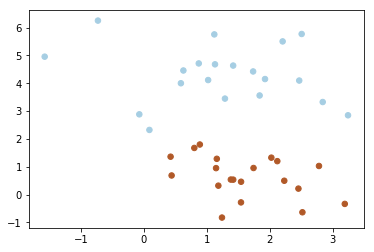

In [340]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
x, y =make_blobs(n_samples=40, centers=2, random_state=0)

model = svm.SVC(kernel='linear', C=1.0)
model.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

## SVM  (Support Vector Machine for predicting cancer is benign or malignant)

Train set: (32, 2) (32,)
Test set: (8, 2) (8,)
actual values     [1 0 0 1 1 1 0 1]
predicted values  [1 0 0 1 1 1 0 1]
accuracy score is  1.0
Confusion matrix is  [[3 0]
 [0 5]]
1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00         8



1.0

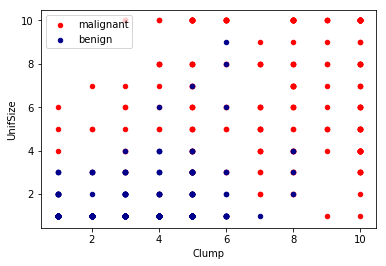

In [414]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv("cell_samples.csv")
df.count()

# The Class field contains the diagnosis, as confirmed by separate medical procedures, 
#as to whether the samples are benign (value = 2) or malignant (value = 4).

plot1 =df[df.Class==4].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant')
df[df.Class==2].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='benign',ax=plot1)


### lets make sure all the fields are numeric for applying alogorith.
df.dtypes
## looks like "BareNuc" is string. lets check
df.BareNuc.unique()
#indeed,it contains the character "?" so we need to get rid of this and convert the fields to interger
df.BareNuc.count()
# df=df[df.BareNuc!="?"]
df.dtypes

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit( x_train, y_train)
print("actual values    ", y_test)
print("predicted values ", model.predict(x_test))
print("accuracy score is ", model.score(x_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix is " , confusion_matrix(y_test, model.predict(x_test)))

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, model.predict(x_test)))

print (classification_report(y_test, model.predict(x_test)))

from sklearn.metrics import f1_score
f1_score(y_test, model.predict(x_test), average='weighted')



  ## Feature Selection - Univariate (Chi Square X2) method

In [50]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print("Chi Square Score is ",  fit.scores_)
print("P Values are        ", fit.pvalues_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

Chi Square Score is  [ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
P Values are         [4.553e-026 5.487e-309 2.718e-005 3.157e-013 0.000e+000 1.326e-029
 2.022e-002 2.516e-041]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## Feature Selection - Recursive Feature Elimination - RFE

In [75]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = 'C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
rfe = RFE(LogisticRegression(), 3)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  3
Selected Features:  [ True False False False False  True  True False]
Feature Ranking:  [1 2 3 5 6 1 1 4]


## Evaluate Machine Learning Algorithms
Why can't you train your machine learning algorithm on your dataset and use predictions from
this same dataset to evaluate machine learning algorithms? The simple answer is overtting.
Imagine an algorithm that remembers every observation it is shown during training. If you
evaluated your machine learning algorithm on the same dataset used to train the algorithm, then
an algorithm like this would have a perfect score on the training dataset. But the predictions it
made on new data would be terrible. We must evaluate our machine learning algorithms on
data that is not used to train the algorithm.
  
we are going to look at four dierent
techniques that we can use to split up our training dataset and create useful estimates of
performance for our machine learning algorithms:

- Train and Test Sets.
- k-fold Cross Validation.
- Leave One Out Cross Validation.
- Repeated Random Test-Train Splits.
   

   ###    Split into Train and Test Sets
The simplest method that we can use to evaluate the performance of a machine learning
algorithm is to use dierent training and testing datasets. We can take our original dataset and
split it into two parts. Train the algorithm on the rst part, make predictions on the second
part and evaluate the predictions against the expected results. The size of the split can depend
on the size and specics of your dataset, although it is common to use 67% of the data for
training and the remaining 33% for testing.
This algorithm evaluation technique is very fast. It is ideal for large datasets (millions of
records) where there is strong evidence that both splits of the data are representative of the
underlying problem. Because of the speed, it is useful to use this approach when the algorithm
you are investigating is slow to train. A downside of this technique is that it can have a high
variance. This means that dierences in the training and test dataset can result in meaningful
dierences in the estimate of accuracy. In the example below we split the Pima Indians dataset
into 67%/33% splits for training and test and evaluate the accuracy of a Logistic Regression
model.

In [113]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
filename = 'C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

result

0.7913385826771654

### K-fold Cross Validation

Cross validation is an approach that you can use to estimate the performance of a machine
learning algorithm with less variance than a single train-test set split. It works by splitting
the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The
algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is
repeated so that each fold of the dataset is given a chance to be the held back test set. After
running cross validation you end up with k different performance scores that you can summarize
using a mean and a standard deviation.
The result is a more reliable estimate of the performance of the algorithm on new data. It is
more accurate because the algorithm is trained and evaluated multiple times on dierent data.
The choice of k must allow the size of each test partition to be large enough to be a reasonable
sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the
algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest
sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are
common. In the example below we use 10-fold cross validation.


In [173]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
# load data
filename = 'C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 7
kfold = KFold(n_splits=num_folds, random_state=0)
result = cross_val_score(LogisticRegression(), X ,Y, cv=kfold)
print(result.mean())
print(result.std())

0.7709043250327655
0.037791423444393464


### Leave One Out Cross Validation

Leave 1 out cross validation works as follows.  The parameter optimisation is performed (automatically) on n-1samples (data observations) and then the performance of the tuned algorithm is tested on the 1 remaining observation. So, if the sample contains 1000 rows, the 999 is the training set and 1 remainting is test set.Now, repeat the process k times, each time leaving out a different pair to use as the single test case. 

In [172]:
# Evaluate using Leave One Out Cross Validation (loocv)
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.linear_model import LogisticRegression
# load data
filename = 'C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 7
loocv = LeaveOneOut()
result = cross_val_score(LogisticRegression(), X ,Y, cv=loocv)
print(result.mean())
print(result.std())

# The score is same as above but the std deviation is more in this case hence more variance

0.76953125
0.4211328831538063


###  Repated Random Test-Train Splits
Another variation on k-fold cross validation is to create a random split of the data like the
train/test split described above, but repeat the process of splitting and evaluation of the
algorithm multiple times, like cross validation. This has the speed of using a train/test split and
the reduction in variance in the estimated performance of k-fold cross validation. You can also
repeat the process many more times as needed to improve the accuracy. A down side is that
repetitions may include much of the same data in the train or the test split from run to run,
introducing redundancy into the evaluation. The example below splits the data into a 67%/33%
train/test split and repeats the process 10 times.

In [174]:
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression
# load data
filename = 'C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 7
kfold = ShuffleSplit(n_splits=num_folds, test_size=0.3, random_state=0)
result = cross_val_score(LogisticRegression(), X ,Y, cv=kfold)
print(result.mean())
print(result.std())

0.7792207792207793
0.016031516879178365


## Algorithm Evaluation Metrics

#### Classification Metrics

Classication problems are perhaps the most common type of machine learning problem and as
such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:
- Accuracy.
- Logarithmic Loss.
- Area Under ROC Curve.
- Confusion Matrix.
- Classification Report.


   ### Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classication problems, it is also the most
misused. It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important,
which is often not the case. Below is an example of calculating classication accuracy.

In [7]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import os
os.chdir("C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set")
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = cross_val_score(LogisticRegression(), X, Y, cv=kfold, scoring=scoring)
print("Accuracy", results.mean() ,  results.std())

Accuracy 0.7695146958304853 0.04841051924567195


### Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the condence of the prediction. Below is an example
of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes
dataset.

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the
measure is inverted to be ascending when using the cross val score() function.

In [35]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss:",results.mean(), results.std())

Logloss: -0.4926551111482703 0.046890273308686774


### Area Under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification
problems. The AUC represents a model's ability to discriminate between positive and negative
classes. An area of 1.0 represents a model that made all predictions perfectly. An area of
0.5 represents a model that is as good as random. ROC can be broken down into sensitivity
and specificity. A binary classification problem is really a trade-of between sensitivity and
specicity.

-  Sensitivity is the true positive rate also called the recall. It is the number of instances
from the positive (rst) class that actually predicted correctly.
-  Specificity is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.

In [38]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: ", results.mean(), results.std())

AUC:  0.8234172339945707 0.04070894393447813


### Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more
classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The
cells of the table are the number of predictions made by a machine learning algorithm. For
example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have
been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and
actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0
and actual = 1. And so on. Below is an example of calculating a confusion matrix for a set of
predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.



Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

![](C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/confusion_matrix_simple2.png)

What can we learn from the above  matrix?
There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):
- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
- true negatives (TN): We predicted no, and they don't have the disease.
- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")
![](C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set/confusion_matrix2.png)

#### * This is a list of rates that are often computed from a confusion matrix for a binary classifier: *####
- #### Accuracy: Overall, how often is the classifier correct? (TP+TN)/total = (100+50)/165 = 0.91

- #### Misclassification Rate: Overall, how often is it wrong? (FP+FN)/total = (10+5)/165 = 0.09  equivalent to 1 minus Accuracy, also known as "Error Rate"
- #### True Positive Rate: When it's actually yes, how often does it predict yes? 
TP/actual yes = 100/105 = 0.95 also known as "Sensitivity" or "Recall"
- #### False Positive Rate: When it's actually no, how often does it predict yes? 
  FP/actual no = 10/60 = 0.17
- #### True Negative Rate: When it's actually no, how often does it predict no? 
  TN/actual no = 50/60 = 0.83 equivalent to 1 minus False Positive Rate also known as "Specificity"
- #### Precision: When it predicts yes, how often is it correct? 
  TP/predicted yes = 100/110 = 0.91
- #### Prevalence: How often does the yes condition actually occur in our sample? 
  actual yes/total = 105/165 = 0.64
###  *A couple other terms are also worth mentioning: * ###
- #### Null Error Rate: 
This is how often you would be wrong if you always predicted the majority class. (In our example, the null error rate would be 60/165=0.36 because if you always predicted yes, you would only be wrong for the 60 "no" cases.) This can be a useful baseline metric to compare your classifier against. However, the best classifier for a particular application will sometimes have a higher error rate than the null error rate, as demonstrated by the Accuracy Paradox.[] (https://en.wikipedia.org/wiki/Accuracy_paradox)
- #### Cohen's Kappa: 
This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance. In other words, a model will have a high Kappa score if there is a big difference between the accuracy and the null error rate. (More details about Cohen's Kappa.)
- #### F Score: 
[] (https://en.wikipedia.org/wiki/F1_score)
This is a weighted average of the true positive rate (recall) and precision. (More details about the F Score.)
- #### ROC Curve: 
This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)
And finally, for those of you from the world of Bayesian statistics, here's a quick summary of these terms from Applied Predictive Modeling:[] (https://www.dataschool.io/roc-curves-and-auc-explained)


In relation to Bayesian statistics, the sensitivity and specificity are the conditional probabilities, the prevalence is the prior, and the positive/negative predicted values are the posterior probabilities.

In [52]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)
model=LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[142  15]
 [ 35  39]]


### Classification Report
The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The classification report() function displays the precision, recall, F1-score and support for each class. The example below demonstrates the report on the binary classification problem.

In [57]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.80      0.90      0.85       157
        1.0       0.72      0.53      0.61        74

avg / total       0.78      0.78      0.77       231



## Regression Metrics
We will review 3 of the most common metrics for evaluating predictions on regression
machine learning problems:
- Mean Absolute Error.
- Mean Squared Error.
- R2.

  ### Mean Absolute Error
  The Mean Absolute Error (or MAE) is the sum of the absolute dierences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).
The example below demonstrates calculating mean absolute error on the Boston house price
dataset.

In [78]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE:",results.mean(), results.std())

MAE: -4.00494663532399 2.0835992687095275


### Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE). The example below
provides a demonstration of calculating mean squared error.

*** Remember to take the absolute value before taking the square root if you are interested in calculating the RMSE.

In [90]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: ", results.mean(), results.std() )

MSE:  -34.7052559445249 45.57399920030874


__R2 Metric__

The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions
to the actual values. In statistical literature this measure is called the coefficient of determination.
This is a value between 0 and 1 for no- fit and perfect fit respectively. The example below
provides a demonstration of calculating the mean R2 for a set of predictions.

In [12]:
# Cross Validation Regression R^2
import os
os.chdir("C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set")
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: ",results.mean(), results.std())

R^2:  0.20252899006056085 0.5952960169512264


## Predicting Diabetic Patients - Classification 

### How to choose the algorithm with highest scores

The Pima Indians dataset is used to demonstrate data loading in this lesson. It will also be used
in many of the lessons to come. This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within five years. As such it
is a classification problem. It is a good dataset for demonstration because all of the input
attributes are numeric and the output variable to be predicted is binary (0 or 1). The data is
freely available from the UCI Machine Learning Repository.

LR 0.7695146958304853
LDA 0.773462064251538
KNN 0.7265550239234451
CART 0.6926008202323992
NB 0.7551777170198223
SVM 0.6510252904989747


NameError: name 'names' is not defined

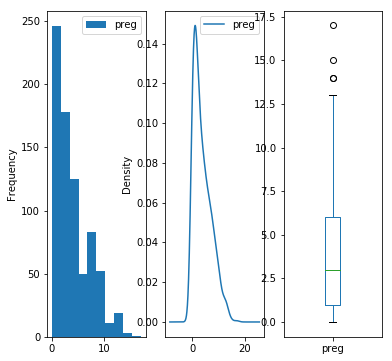

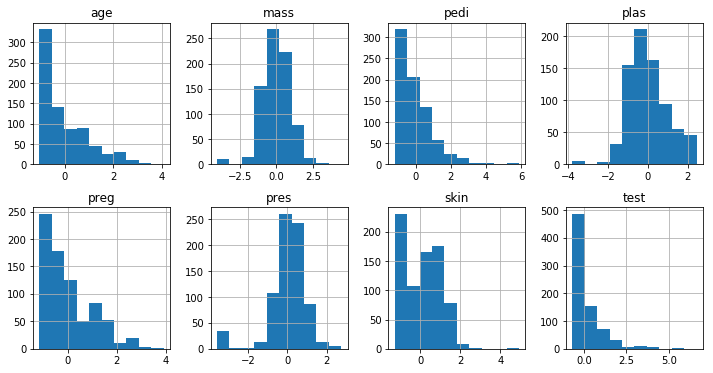

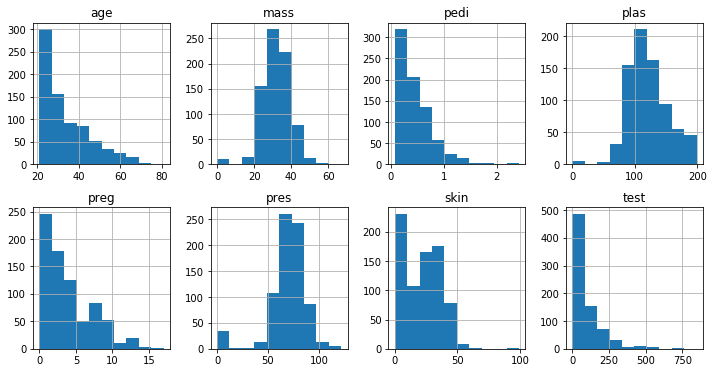

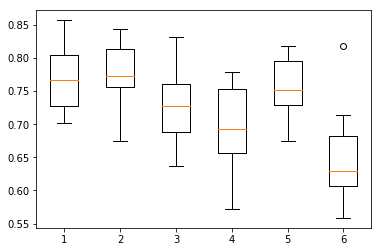

In [2]:
import os
os.chdir("C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set")
import pandas as pd
import numpy as np
df = pd.read_csv("pima-indians-diabetes.data.csv",names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df.dtypes
# pd.set_option('display.width', 50)
pd.set_option('precision', 3)
df.describe()
df['class'].value_counts()
df.groupby('class').size()

# Pairwise Pearson correlations
df.corr()

# descriptuve analysis gives an idea of the spread of the data.
df.describe()

# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
df.skew()

# plots 

import matplotlib.pyplot as plt
# %matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6,6))
# df.hist(layout=(4,3), figsize=(10,10))
df.plot(kind="hist",y="preg", ax=ax[0])
df.plot(kind='kde', y="preg", ax=ax[1])
df.plot(kind='box',y="preg", ax=ax[2])

# When your data is comprised of attributes with varying scales, many machine learning algorithms
# can benefit from rescaling the attributes to all have the same scale. Often this is referred to
# as normalization and attributes are often rescaled into the range between 0 and 1. This is
# useful for optimization algorithms used in the core of machine learning algorithms like gradient
# descent. It is also useful for algorithms that weight inputs like regression and neural networks
# and algorithms that use distance measures like k-Nearest Neighbors. You can rescale your data
# using scikit-learn using the MinMaxScaler class

from sklearn.preprocessing import MinMaxScaler
x= df.iloc[:,0:8].values
y=df.iloc[:,8].values
scale=MinMaxScaler(feature_range=(0,1))
rescaledX = scale.fit_transform(x)
pd.DataFrame(rescaledX)

# Standardization is a useful technique to transform attributes with a Gaussian distribution and
# differing means and standard deviations to a standard Gaussian distribution with a mean of
# 0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian
# distribution in the input variables and work better with rescaled data, such as linear regression,
# logistic regression and linear discriminate analysis. You can standardize data using scikit-learn
# with the StandardScaler class.

# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
X= scaler.transform(x)
pd.set_option("precision", 20)

# showing all the means almost 0 and std 1
pd.DataFrame(X).describe() 


#  lets plot the distribution of original values in the dataframe vs the newer standardized values 

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
pd.DataFrame(X, columns= ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']).hist(ax=ax)
df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']].hist(layout=(2,4), figsize=(12,6))

# Choose The Best Machine Learning Model.lets compare the six different classification algorithms on a same dataset:
#  Logistic Regression.
#  Linear Discriminant Analysis.
#  k-Nearest Neighbors.
#  Classification and Regression Trees.
#  Naive Bayes.
#  Support Vector Machines.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

 # load dataset
df = pd.read_csv('pima-indians-diabetes.data.csv', names=['preg','plas','pres','skin','test','mass','pedi','age','class'])
X= df.iloc[:,0:8].values
Y= df.iloc[:, 8].values

# evaluate each model witout applying any standadizations or normalization
results=[]
models = {
         "LR" : LogisticRegression(), 
         "LDA":LinearDiscriminantAnalysis(),
         "KNN" : KNeighborsClassifier(), 
         "CART" : DecisionTreeClassifier(),
         "NB" : GaussianNB(), 
         "SVM":SVC()
         }
for name, model in models.items():
    cv_results = cross_val_score(model, X, Y, cv= KFold(n_splits=10, random_state=7), scoring='accuracy')
    results.append(cv_results)
    print(name, cv_results.mean())
    
# boxplot algorithm comparison
from matplotlib import pyplot  as plt
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.show()


# Now evaluate each model with applying standadizations (z score)

pipelinestd = {
            'StdLR':  Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())]),
            'StdLDA': Pipeline([('Scaler', StandardScaler()), ('LR', LinearDiscriminantAnalysis())]),
            'StdKNN': Pipeline([('Scaler', StandardScaler()), ('LR', KNeighborsClassifier())]),
            'StdCART':Pipeline([('Scaler', StandardScaler()), ('LR', DecisionTreeClassifier())]),
            'StdNB':  Pipeline([('Scaler', StandardScaler()), ('LR', GaussianNB())]),
            'StdSVM': Pipeline([('Scaler', StandardScaler()), ('LR', SVC())]),
            'StdRF':  Pipeline([('Scaler', StandardScaler()), ('LR', RandomForestClassifier(max_depth=3, random_state=0))])
            }
print("********************")
print("********************")
for key, value in pipelinestd.items():
    print(key, cross_val_score(value, X, Y, cv=7, scoring='accuracy').mean())
    

# Now evaluate each model with applying normalization i.e. MinMaxScaler.

pipelinescale = {
            'ScaledLR':  Pipeline([('Scaler', MinMaxScaler()), ('LR', LogisticRegression())]),
            'ScaledLDA': Pipeline([('Scaler', MinMaxScaler()), ('LR', LinearDiscriminantAnalysis())]),
            'ScaledKNN': Pipeline([('Scaler', MinMaxScaler()), ('LR', KNeighborsClassifier())]),
            'ScaledCART':Pipeline([('Scaler', MinMaxScaler()), ('LR', DecisionTreeClassifier())]),
            'ScaledNB':  Pipeline([('Scaler', MinMaxScaler()), ('LR', GaussianNB())]),
            'ScaledSVM': Pipeline([('Scaler', MinMaxScaler()), ('LR', SVC())]),
            'ScaledRF':  Pipeline([('Scaler', MinMaxScaler()), ('LR', RandomForestClassifier(max_depth=3, random_state=0))])
            }
print("********************")
print("********************")
for key, value in pipelinescale.items():
    print(key, cross_val_score(value, X, Y, cv=7, scoring='accuracy').mean())
    


## Predicting Housing Price - Regression
#### How to choose the algorithm with highest scores

we are going to take a look at seven regression algorithms that you can spot-check
on your dataset. Starting with four linear machine learning algorithms:
- Linear Regression.
- Ridge Regression.
- LASSO Linear Regression.
- Elastic Net Regression.
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Support Vector Machines.


In [2]:
import os
os.chdir("C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/Data Set")
import pandas as pd
import numpy as np
df = pd.read_csv('housing.csv',delim_whitespace=True, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV'])
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
df.corr()
X=df.iloc[:, 0:13].values
Y=df.iloc[:, -1].values

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression, LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# evaluate each model witout applying any standadizations or normalization
results=[]
models = {
         "Linear" :     LinearRegression(), 
         "Ridge":       Ridge(),
         "Lasso" :      Lasso(), 
         "ElasticNet" : ElasticNet(),
         "KNN Regressor" : KNeighborsRegressor(), 
         "CART Regressor": DecisionTreeRegressor(),
         "SVM Regressor":  SVR()
         }
for name, model in models.items():
    cv_results = cross_val_score(model, X, Y, cv= KFold(n_splits=10, random_state=7), scoring='r2')
    results.append(cv_results)
    print(name, cv_results.mean())
    

# Now evaluate each model with applying standadizations (z score)

pipelinestd = {
            'StdLR':  Pipeline([('Scaler', StandardScaler()), ('Linear', LinearRegression())]),
            'StdLDA': Pipeline([('Scaler', StandardScaler()), ('Ridge', Ridge())]),
            'StdKNN': Pipeline([('Scaler', StandardScaler()), ('Lasso', Lasso())]),
            'StdCART':Pipeline([('Scaler', StandardScaler()), ('ElasticNet', ElasticNet())]),
            'StdNB':  Pipeline([('Scaler', StandardScaler()), ('KNN Regressor', KNeighborsRegressor())]),
            'StdSVM': Pipeline([('Scaler', StandardScaler()), ('CART Regressor', DecisionTreeRegressor())]),
            'StdRF':  Pipeline([('Scaler', StandardScaler()), ('SVM Regressor', SVR())])
              }
print("********************")
print("********************")
for key, value in pipelinestd.items():
    print(key, cross_val_score(value, X, Y, cv=7, scoring='r2').mean())
   


pipelinescale = {
            'ScaleLR':  Pipeline([('Scaler', MinMaxScaler()), ('Linear', LinearRegression())]),
            'ScaleA':   Pipeline([('Scaler', MinMaxScaler()), ('Ridge', Ridge())]),
            'ScaleKNN': Pipeline([('Scaler', MinMaxScaler()), ('Lasso', Lasso())]),
            'ScaleCART':Pipeline([('Scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())]),
            'ScaleNB':  Pipeline([('Scaler', MinMaxScaler()), ('KNN Regressor', KNeighborsRegressor())]),
            'ScaleSVM': Pipeline([('Scaler', MinMaxScaler()), ('CART Regressor', DecisionTreeRegressor())]),
            'ScaleRF':  Pipeline([('Scaler', MinMaxScaler()), ('SVM Regressor', SVR())])
              }
print("********************")
print("********************")
for key, value in pipelinescale.items():
    print(key, cross_val_score(value, X, Y, cv=7, scoring='r2').mean())

Linear 0.20252899006056085
Ridge 0.256166870375934
Lasso 0.1982897462617752
ElasticNet 0.22774942615238097
KNN Regressor -4.949260514859802
CART Regressor -0.2633981965597508
SVM Regressor -1.0050199190593039
********************
********************
StdLR 0.45059442471362854
StdLDA 0.4542845130788272
StdKNN 0.3898000695230918
StdCART 0.4239539067279083
StdNB 0.4649925402550886
StdSVM 0.44259113182251075
StdRF 0.43330265795736356
********************
********************
ScaleLR 0.4505944247136285
ScaleA 0.5020012917272266
ScaleKNN -0.2566249206330889
ScaleCART -0.3313256387432098
ScaleNB 0.31188117806155946
ScaleSVM 0.431529168095199
ScaleRF 0.16805604798405513


## Improve Performance with Ensembles

Ensembles can give you a boost in accuracy on your dataset. We will use different typess of ensembles using scikit-learn such as Boosting, Bagging and Majority Voting to show how we can continue to improve the accuracy of the models on a given darasetdatasets. 

The three most popular methods are:
- Bootstrap or Bagging: Building multiple models (typically of the same type) from different subsamples
of the training dataset.
- Boosting: Building multiple models (typically of the same type) each of which learns to
fix the prediction errors of a prior model in the sequence of models.
- Voting: Building multiple models (typically of differing types) and simple statistics (like
calculating the mean) are used to combine predictions.

### Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The final output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:
- Bagged Decision Trees.
- Random Forest.
- Extra Trees.


### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a 
final output prediction. The two most common boosting ensemble machine learning algorithms are:
- AdaBoost.
- Stochastic Gradient Boosting.


### Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classification using the GradientBoostingClassifier. The
example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.


In [69]:
# Bagged , Boosting  algorithms 
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import  BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=0)


models = {
         "Bagged DT" : BaggingClassifier( DecisionTreeClassifier(), n_estimators=100, random_state=0) ,
         "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=0) ,
         "Extra Tree" : ExtraTreesClassifier(n_estimators=100, random_state=0),
         "AdBoost" : AdaBoostClassifier(n_estimators=100, random_state=0),
         "GradientBoost" : GradientBoostingClassifier(n_estimators=100, random_state=0)
         }
for name, model in models.items():
    cv_results = cross_val_score(model, X, Y, cv= KFold(n_splits=100, random_state=0), scoring='accuracy')
    results.append(cv_results)
    print(name, cv_results.mean())

AdaBoostClassifier()


Bagged DT 0.7648214285714287
Random Forest 0.7633928571428571
Extra Tree 0.7582142857142855
AdBoost 0.7612499999999999
GradientBoost 0.765


### Voting is one of the simplest ways of combining the predictions from multiple machine learning
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classifiers manually or even heuristically is difficult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classification using the VotingClassifier
class6. The code below provides an example of combining the predictions of logistic regression,
classification and regression trees and support vector machines together for a classification
problem.

In [5]:
# Voting Ensemble for Classification
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
vc = VotingClassifier([('logistic', LogisticRegression()),
              ('cart', DecisionTreeClassifier() ), 
              ('svm',SVC())
               ]
              )
models = {  'logistic': LogisticRegression(),
            'cart'    : DecisionTreeClassifier(), 
            'svm'     : SVC(), 
            'VC'      :  vc
         }
#create the ensemble model
for name , model in models.items():
                       results = cross_val_score(model, X, Y, cv=kfold, scoring="f1")
                       print(name, results.mean())

## Improve Performance with Algorithm Tuning
Algorithm tuning is a final step in the process of applied machine learning before finalizing your
model. It is sometimes called hyperparameter optimization where the algorithm parameters
are referred to as hyperparameters, whereas the coefficients found by the machine learning
algorithm itself are referred to as parameters. Optimization suggests the search-nature of the
problem. Phrased as a search problem, you can use different search strategies to end a good and
robust parameter or set of parameters for an algorithm on a given problem. Python scikit-learn
provides two simple methods for algorithm parameter tuning:

1. How to use a grid search algorithm tuning strategy.
2. How to use a random search algorithm tuning strategy.

### Grid Search Parameter Tuning
Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters specified in a grid. You can perform a grid
search using the GridSearchCV. The example below evaluates different alpha values for
the Ridge Regression algorithm on the standard diabetes dataset. This is a one-dimensional
grid search.


In [51]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# alphas = [1,0.1,0.01,0.001,0.0001,0]
# param_grid = dict(alpha=alphas)
# param_grid = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
from scipy.stats import uniform
param = {"max_depth": [1,2,3,4,5,6,7, 8,9,10,20,30]
        }
model =  DecisionTreeRegressor() 
grid = GridSearchCV(estimator=model, param_grid=param)
grid.fit(X, Y)

print(grid.best_estimator_)
print(grid.best_score_, grid.best_params_,)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
0.2007769265490015 {'max_depth': 3}


### Random Search Parameter Tuning

Random search is an approach to parameter tuning that will sample algorithm parameters from
a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed
and evaluated for each combination of parameters chosen. You can perform a random search
for algorithm parameters using the RandomizedSearchCV. The example below evaluates
different random alpha values between 0 and 1 for the Ridge Regression algorithm on the
standard diabetes dataset. A total of 100 iterations are performed with uniformly random alpha
values selected in the range between 0 and 1 (the range that alpha values can take).

In [47]:
# Randomized for Algorithm Tuning
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
param_grid = {'alpha': uniform()}
model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.2795408208784849
0.0014268805627581926


In [13]:
from scipy.stats import uniform
param_grid = {'alpha': uniform()}
param_grid.values()

dict_values([<scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D9AEFC15F8>])

## Save and Load Machine Learning Models
Finding an accurate machine learning model is not the end of the project. We will discover how to save and load your machine learning model in Python using scikit-learn.This allows to save our models to file and load it later in order to make predictions. We will cover the followings:

1. How to use pickle to serialize and deserialize machine learning models.
2. How to use Joblib to serialize and deserialize machine learning models.

### Pickle is the standard way of serializing objects in Python. 
We can use Pickle operation to serialize your machine learning algorithms and save the serialized format to a fille.
Later on you you can load this fille to deserialize your model and use it to make new predictions. The example below demonstrates how you can train a logistic regression model on the Pima Indians onset of diabetes dataset, save the model to file and load it to make predictions on the unseen test set.

Note : Serialization is the process of converting an object into a stream of bytes to store the object or transmit it to memory,a database, or a file. Its main purpose is to save the state of an object in order to be able to recreate it when needed.The reverse process is called deserialization.






In [162]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump, load

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# some time later...


# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)


0.7559055118110236
